## Fingerprint Algo of Openrefine by Google

Copyright 2010, Google Inc.
All rights reserved.

Reference Link -> https://openrefine.org/docs/technical-reference/clustering-in-depth




by Pranav Sorte
LinkedIn - https://www.linkedin.com/in/pranav-narendra-sorte-7b38721b4/

## Creating input excel file for testing the FingerPrint Algo

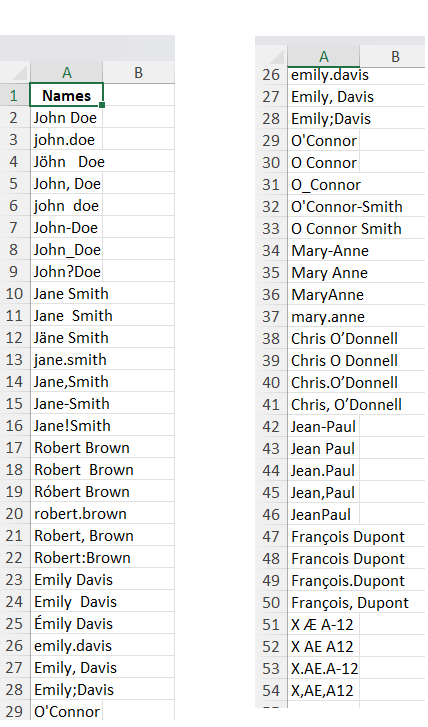

In [ ]:
import pandas as pd

# Creating a dataset with diverse name variations for testing the fingerprint algorithm
test_data = {
    "Names": [
        "John Doe", "john.doe", "Jöhn   Doe", "John, Doe", "john  doe", "John-Doe", "John_Doe", "John?Doe",
        "Jane Smith", "Jane  Smith", "Jäne Smith", "jane.smith", "Jane,Smith", "Jane-Smith", "Jane!Smith",
        "Robert Brown", "Robert  Brown", "Róbert Brown", "robert.brown", "Robert, Brown", "Robert:Brown",
        "Emily Davis", "Emily  Davis", "Émily Davis", "emily.davis", "Emily, Davis", "Emily;Davis",
        "O'Connor", "O Connor", "O_Connor", "O'Connor-Smith", "O Connor Smith",
        "Mary-Anne", "Mary Anne", "MaryAnne", "mary.anne",
        "Chris O’Donnell", "Chris O Donnell", "Chris.O’Donnell", "Chris, O’Donnell",
        "Jean-Paul", "Jean Paul", "Jean.Paul", "Jean,Paul", "JeanPaul",
        "François Dupont", "Francois Dupont", "François.Dupont", "François, Dupont",
        "X Æ A-12", "X AE A12", "X.AE.A-12", "X,AE,A12",
    ]
}

# Creating a DataFrame
df_test = pd.DataFrame(test_data)

# Saving to an Excel file
test_file_path = "test_names_variations.xlsx"
df_test.to_excel(test_file_path, index=False)

# Provide the file to the user
test_file_path


'test_names_variations.xlsx'

## Creating Fingerprint Algo in Python

In [ ]:
import unicodedata
import re
import pandas as pd
from collections import defaultdict

class FingerprintKeyer:
    PUNCTCTRL = re.compile(r"[^\w\s]", re.UNICODE)  # Removes all punctuation
    WHITESPACE = re.compile(r"\s+", re.UNICODE)  # Normalizes spaces

    NONDIACRITICS = {
        "ß": "ss", "æ": "ae", "ø": "oe", "å": "aa", "©": "c",
        "ð": "d", "đ": "d", "ɖ": "d", "þ": "th",
        "ƿ": "w", "ħ": "h", "ı": "i", "ĸ": "k",
        "ł": "l", "ŋ": "n", "ſ": "s", "ŧ": "t",
        "œ": "oe", "ẜ": "s", "ẝ": "s"
    }

    def key(self, s: str) -> str:
        if not isinstance(s, str):
            return None
        return " ".join(sorted(set(self.normalize(s, strong=True).split())))

    def normalize(self, s: str, strong: bool = False) -> str:
      """Normalizes text by removing diacritics, punctuation, and spaces"""
      if strong:
          s = s.strip().lower()

      # Ensure concatenated words (e.g., "JeanPaul") are properly spaced
      s = re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', s)  # Adds space between lowercase-uppercase transitions

      # Replace problematic characters with spaces
      s = re.sub(r"[-.',_:/;!?()’]", " ", s)  # Handles all punctuation consistently

      s = self.strip_diacritics(s)
      s = self.strip_non_diacritics(s)
      s = self.PUNCTCTRL.sub("", s)  # Remove remaining punctuation
      s = self.WHITESPACE.sub(" ", s)  # Normalize multiple spaces to a single space

      tokens = s.split()
      tokens = sorted(set(tokens))  # Sort words and remove duplicates
      return " ".join(tokens)


    @staticmethod
    def strip_diacritics(text: str) -> str:
        """Removes diacritics (e.g., é → e, ñ → n)"""
        normalized = unicodedata.normalize('NFKD', text)
        return ''.join(c for c in normalized if not unicodedata.combining(c))

    def strip_non_diacritics(self, text: str) -> str:
        return ''.join(self.NONDIACRITICS.get(c, c) for c in text)

def cluster_data(file_path):
    """Reads an Excel file, applies fingerprinting, and clusters similar names"""

    # Load Excel file
    df = pd.read_excel(file_path)

    # Initialize Keyer
    keyer = FingerprintKeyer()

    # Dictionary to store clusters
    clusters = defaultdict(list)

    # Process each name
    for name in df["Names"]:
        key = keyer.key(name)
        clusters[key].append(name)

    # Convert clusters into a structured format
    cluster_list = [{"Cluster Key": key, "Names": ", ".join(variations)} for key, variations in clusters.items()]

    # Create a DataFrame for results
    clustered_df = pd.DataFrame(cluster_list)

    # Save clustered results to a new Excel file
    output_file = "clustered_names3.xlsx"
    clustered_df.to_excel(output_file, index=False)

    return output_file

# Example usage
if __name__ == "__main__":
    file_path = "test_names_variations.xlsx"  # Your input Excel file
    output_file = cluster_data(file_path)
    print(f"Clustered results saved at: {output_file}")


Clustered results saved at: clustered_names3.xlsx


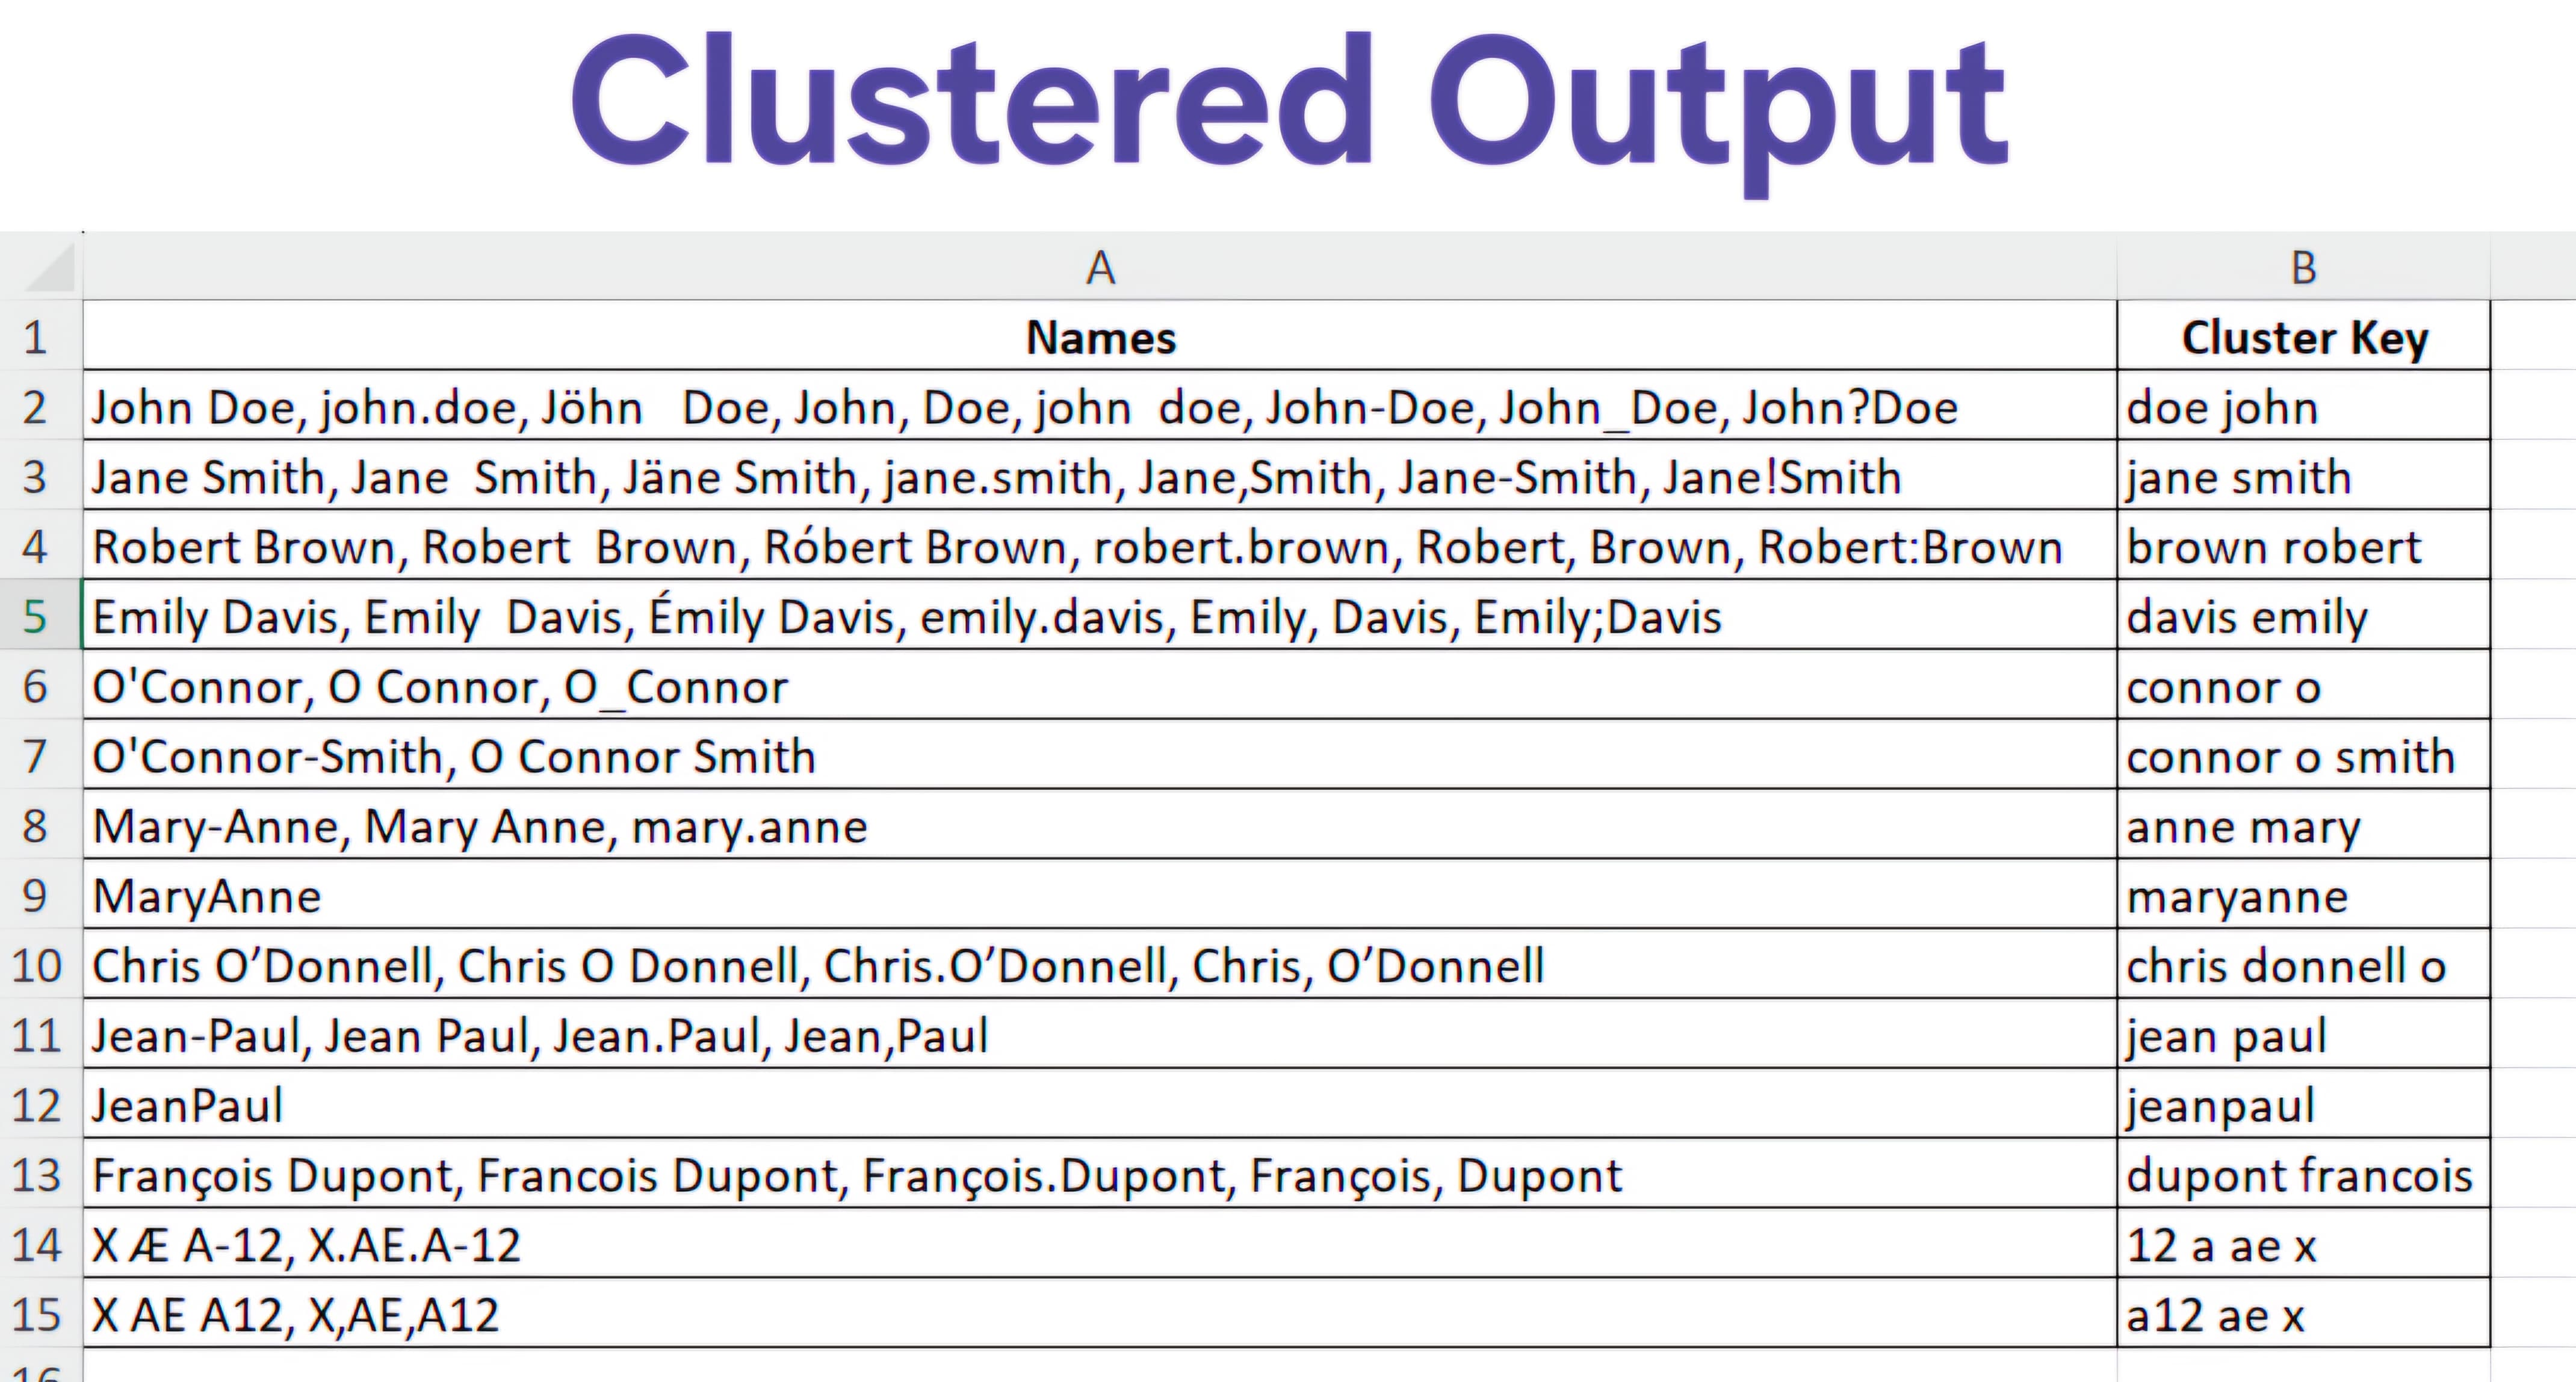